In [1]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import os

In [2]:
df = pd.read_csv(os.path.join("..", "Resources", "eqtestEQIRIS2.csv"))
df.head()

,DistFault,MagType,BuildingType,EraAge,Stories,Retrofit,SoilType,Outcome
0,5.1,3.5,1.4,0.2,0.2,4.8,0.3,green
1,4.9,3.0,1.4,0.2,0.2,4.9,0.3,green
2,4.7,3.2,1.3,0.2,0.2,4.4,0.2,green
3,4.6,3.1,1.5,0.4,0.2,5.1,0.4,green
4,5.0,3.6,1.4,0.3,0.2,5.0,0.2,green


In [3]:
y = df["Outcome"]
target_names = ["negative", "positive"]

In [4]:
X = df.drop("Outcome", axis=1)
X.head()

,DistFault,MagType,BuildingType,EraAge,Stories,Retrofit,SoilType
0,5.1,3.5,1.4,0.2,0.2,4.8,0.3
1,4.9,3.0,1.4,0.2,0.2,4.9,0.3
2,4.7,3.2,1.3,0.2,0.2,4.4,0.2
3,4.6,3.1,1.5,0.4,0.2,5.1,0.4
4,5.0,3.6,1.4,0.3,0.2,5.0,0.2


In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [6]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data

X_scaler = StandardScaler().fit(X_train)
X_scaler

StandardScaler()

In [7]:
# Transform the training and testing data using the X_scaler and y_scaler models

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
X_train_scaled

array([[-1.01827123,  1.30636523, -1.39489006, -1.23685845, -1.38076257,
        -0.9786408 , -1.39588874],
       [-0.7730102 ,  2.46390403, -1.33696359, -1.50663089, -1.38076257,
        -0.73800903, -1.39588874],
       [-0.03722712, -0.77720463,  0.74838929,  0.92132105,  0.92131443,
        -0.01611373,  0.92328417],
       [ 0.20803391,  0.8433497 ,  0.40083048,  0.51666239,  0.51506555,
         0.22451803,  0.51401837],
       [ 1.06644751,  0.14882642,  0.51668341,  0.38177617,  0.37964925,
         1.06672921,  0.37759643],
       [-0.52774918,  2.00088851, -1.45281653, -1.10197223, -1.10992998,
        -0.37706138, -1.39588874],
       [-0.52774918,  1.53787299, -1.33696359, -1.10197223, -1.38076257,
        -0.9786408 , -1.39588874],
       [-0.40511866, -1.47172791, -0.06258127, -0.29265492, -0.29743222,
        -0.37706138, -0.30451325],
       [ 0.57592545, -0.54569687,  0.74838929,  0.38177617,  0.37964925,
         0.58546568,  0.37759643],
       [ 0.69855596,  0.1488

In [8]:
X_test_scaled

array([[ 0.33066442, -0.54569687,  0.51668341, -0.02288248, -0.02659963,
         0.34483392, -0.03166938],
       [-0.15985763,  1.76938075, -1.22111065, -1.23685845, -1.24534628,
        -0.9786408 , -1.39588874],
       [ 2.29275265, -1.00871239,  1.79106573,  1.46086592,  1.46297961,
         2.26988805,  1.46897192],
       [ 0.20803391, -0.3141891 ,  0.40083048,  0.38177617,  0.37964925,
         0.22451803,  0.37759643],
       [ 1.18907802, -0.54569687,  0.57460988,  0.24688995,  0.24423296,
         1.1870451 ,  0.24117449],
       [-0.52774918,  0.8433497 , -1.33696359, -1.10197223, -1.38076257,
        -0.49737727, -1.39588874],
       [-0.28248815, -0.3141891 , -0.12050774,  0.11200374,  0.10881666,
        -0.2567455 ,  0.10475256],
       [ 1.31170853,  0.14882642,  0.74838929,  1.46086592,  1.46297961,
         1.30736098,  1.46897192],
       [ 0.45329494, -1.93474343,  0.40083048,  0.38177617,  0.37964925,
         0.4651498 ,  0.37759643],
       [-0.03722712, -0.7772

k: 1, Train/Test Score: 1.000/0.974
k: 3, Train/Test Score: 0.938/1.000
k: 5, Train/Test Score: 0.955/1.000
k: 7, Train/Test Score: 0.955/1.000
k: 9, Train/Test Score: 0.938/1.000
k: 11, Train/Test Score: 0.938/1.000
k: 13, Train/Test Score: 0.938/1.000
k: 15, Train/Test Score: 0.938/1.000
k: 17, Train/Test Score: 0.938/1.000
k: 19, Train/Test Score: 0.938/1.000


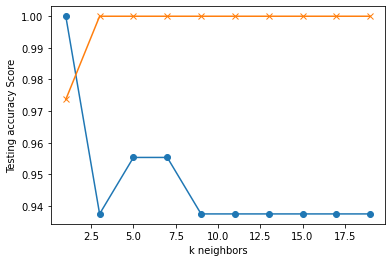

In [9]:
# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

k: 1, Train/Test Score: 1.000/0.974
k: 3, Train/Test Score: 0.938/1.000
k: 5, Train/Test Score: 0.955/1.000
k: 7, Train/Test Score: 0.955/1.000
k: 9, Train/Test Score: 0.938/1.000
k: 11, Train/Test Score: 0.938/1.000
k: 13, Train/Test Score: 0.938/1.000
k: 15, Train/Test Score: 0.938/1.000
k: 17, Train/Test Score: 0.938/1.000
k: 19, Train/Test Score: 0.938/1.000


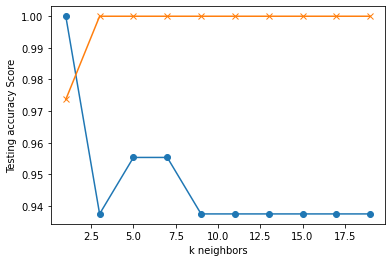

In [10]:
# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [11]:
# Note that k: 13 seems to be the best choice for this dataset
knn = KNeighborsClassifier(n_neighbors=13)
knn.fit(X_train_scaled, y_train)
print('k=13 Test Acc: %.3f' % knn.score(X_test_scaled, y_test))

k=13 Test Acc: 1.000
